In [17]:
from sklearn.datasets import make_classification

In [18]:
x, y = make_classification(n_samples = 2500, n_classes = 2,n_features = 2, n_redundant = 0)

In [19]:
x.shape,y.shape

((2500, 2), (2500,))

In [20]:
x

array([[-1.40224307,  1.14408454],
       [ 0.83543463,  1.04520188],
       [ 0.70285752, -0.63657927],
       ...,
       [ 0.60311475, -0.61860181],
       [ 0.91429285,  1.55527923],
       [ 0.86729885, -1.99657512]])

In [21]:
y

array([0, 1, 1, ..., 1, 1, 1])

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/mac-12/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


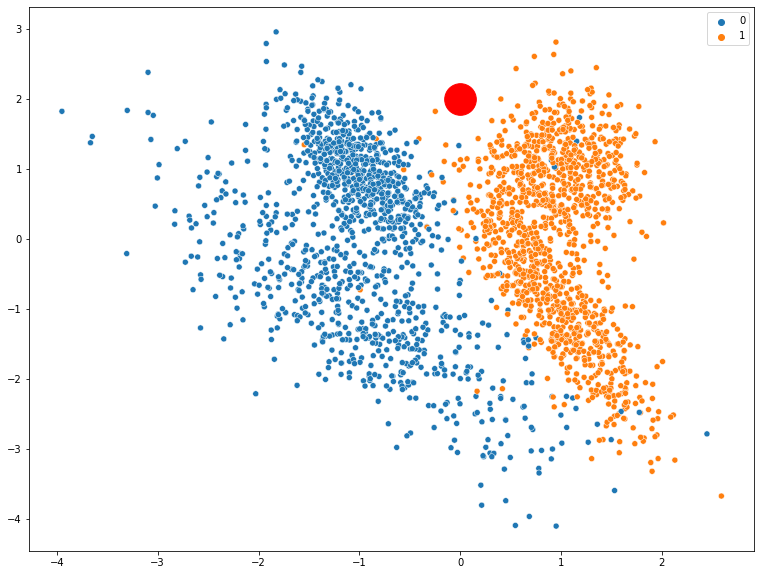

In [23]:
plt.figure(figsize = (13, 10))
#plt.scatter(x[:, 0],x[:,1], c = y)
sns.scatterplot(x[:, 0], y = x[:,1], hue = y)
plt.scatter(0 , 2 , c = "red" , s = 1000)
plt.show()


Implementing KNN from scratch


In [24]:
import numpy as np


In [25]:
x.shape[0]

2500

In [26]:
def KNN(k,a,b):
  total_distances = []
  for i in range(x.shape[0]):
    # Step 1: Calculting distance from all the points
    distance = np.sqrt((x[i][0] - a) ** 2 + (x[i][1] - b) ** 2)

    # Step 2: Append distance with category
    total_distances.append([distance, y[i]])

  # Step 3: Sorting the distance in ascending order based on distance
  total_distances.sort()

  # Step 4: Fetching out initial k points from the list
  total_distances = total_distances[: k]

  # Step 5: Selecting the most occuring category from the initial k points
  count_0, count_1 = 0,0
  for i in range(k):
    if total_distances[i][1] == 0:
      count_0 += 1
    else:
      count_1 +=1
  
  # Step 6: Return the most occuring category
  return 1 if count_1 > count_0 else 0



In [27]:
KNN(10,0,2)



1

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
classifier = KNeighborsClassifier(n_neighbors = int(np.sqrt(x.shape[0])))

In [30]:
classifier.fit(x,y)

KNeighborsClassifier(n_neighbors=50)

In [31]:
classifier.predict(np.array([0,2]).reshape(1,-1))[0]

1

In [32]:
import pickle
pickle.dump(classifier, open('knn.pkl', 'wb'))